In [1]:
qui use data/boardlevel_finance_share_20220214, clear    

In [2]:
drop if top30public==1

(432 observations deleted)


In [3]:
qui collapse (mean) pehedge otherfinance, by(year)

In [4]:
qui    local new = _N + 4
qui        set obs `new'
forvalues y=1/4 {
qui     replace year=2003-`y' if _n==16+`y'
}

In [5]:
qui replace pehedge=pehedge*100
qui replace otherfinance=otherfinance*100

In [6]:
label define y 1999 "." 2000 "." 2001 "." 2002 "."
label values year y
label var pehedge "private equity / hedge fund managers"
label var otherfinance "other financiers"

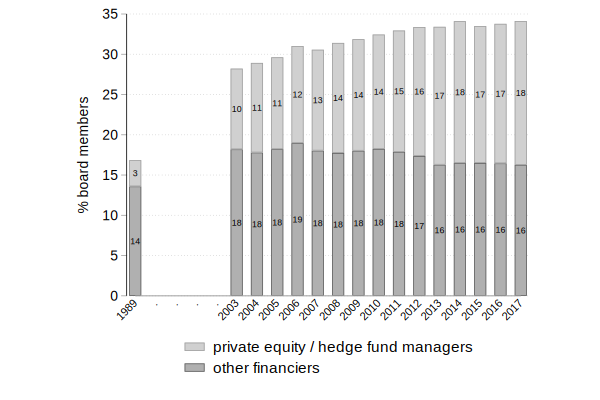

In [7]:
graph bar (asis) otherfinance pehedge, over(year, label(angle(45))) stack scheme(plotplain) ///
legend(size(medium) label() order(2 1) pos(6)) ytitle(% board members) ///
ylabel(0(5)35, labsize(medsmall)) ///
blabel(bar, pos(center) format(%3.0f) size(2.2)) ///
plotregion(margin(zero)) aspect(.7)